In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# warnings handling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [3]:
#read the file
df = pd.read_csv('src/conversion_data_train.csv')

In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 284580

Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0



Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [5]:
# sample  for EDA
data_sample = df.sample(10000)

<AxesSubplot: title={'center': 'Répartition par pays'}, xlabel='country'>

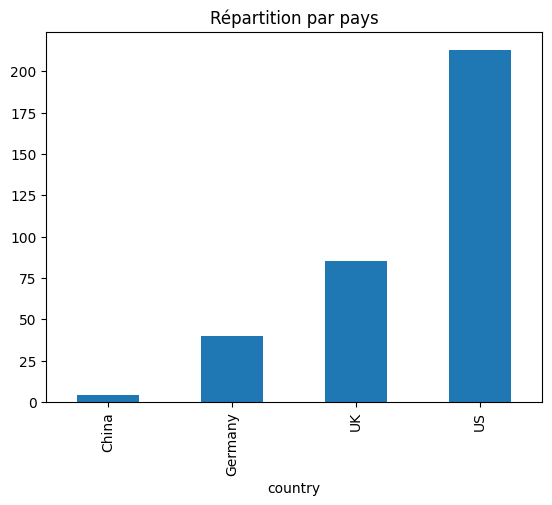

In [6]:
data_sample.groupby(["country"])['converted'].sum().plot(kind='bar', title= "Répartition par pays")

<AxesSubplot: title={'center': 'Répartition par age'}, xlabel='age'>

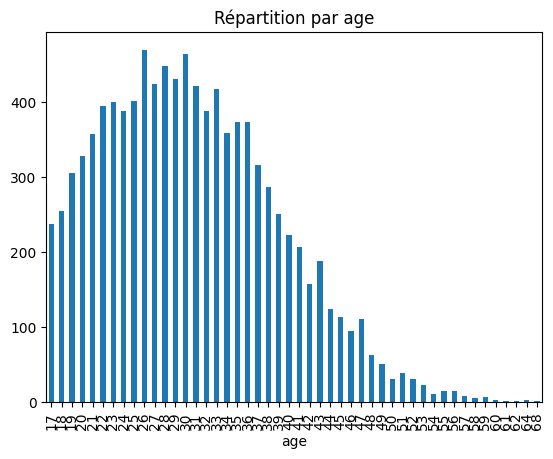

In [7]:
data_sample.groupby(["age"]).size().plot(kind='bar', title= "Répartition par age")

<AxesSubplot: title={'center': 'Répartition par nouvel utilisateur'}, xlabel='new_user'>

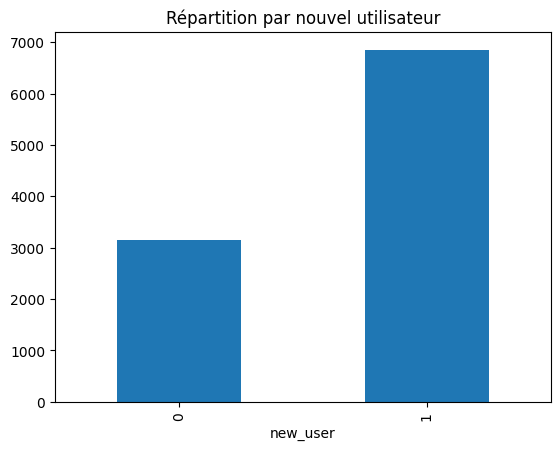

In [8]:
data_sample.groupby(["new_user"]).size().plot(kind='bar', title= "Répartition par nouvel utilisateur")

<AxesSubplot: title={'center': 'Répartition par source'}, xlabel='source'>

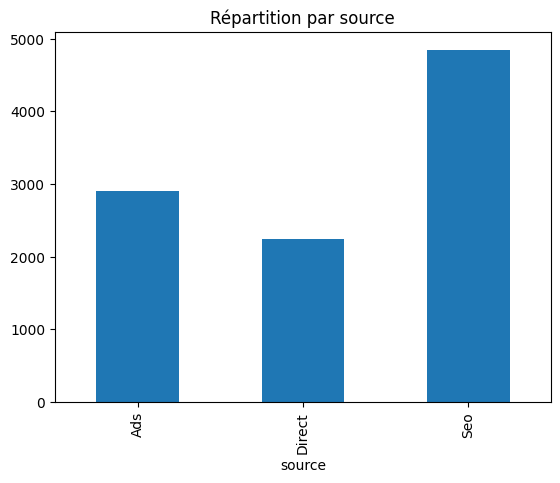

In [9]:
data_sample.groupby(["source"]).size().plot(kind='bar', title= "Répartition par source")

<AxesSubplot: title={'center': 'Répartition par nombre de pages visitées'}, xlabel='total_pages_visited'>

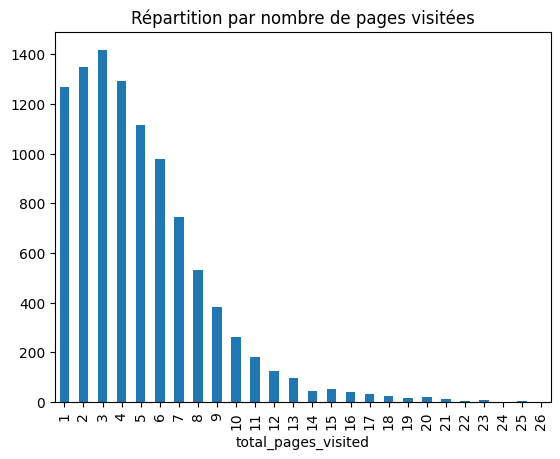

In [10]:
data_sample.groupby(["total_pages_visited"]).size().plot(kind='bar', title= "Répartition par nombre de pages visitées")

In [11]:
corr = data_sample.corr()
display(corr)

,age,new_user,total_pages_visited,converted
age,1.000000,0.000520,-0.043164,-0.088552
new_user,0.000520,1.000000,-0.094410,-0.155492
total_pages_visited,-0.043164,-0.094410,1.000000,0.546432
converted,-0.088552,-0.155492,0.546432,1.000000


<AxesSubplot: >

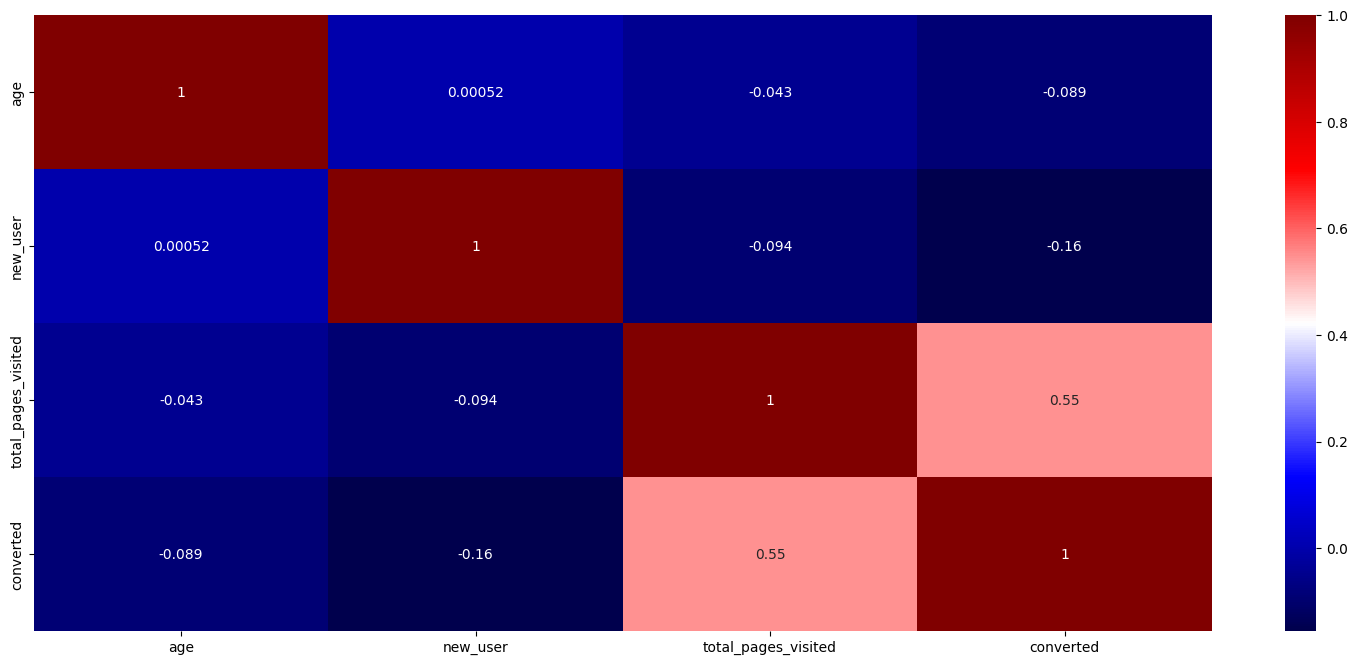

In [12]:
f, ax = plt.subplots(figsize=(19, 8))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'seismic')

<AxesSubplot: title={'center': 'Répartition de la somme de personne adhérentes par rapport au total de pages visitées'}, xlabel='total_pages_visited'>

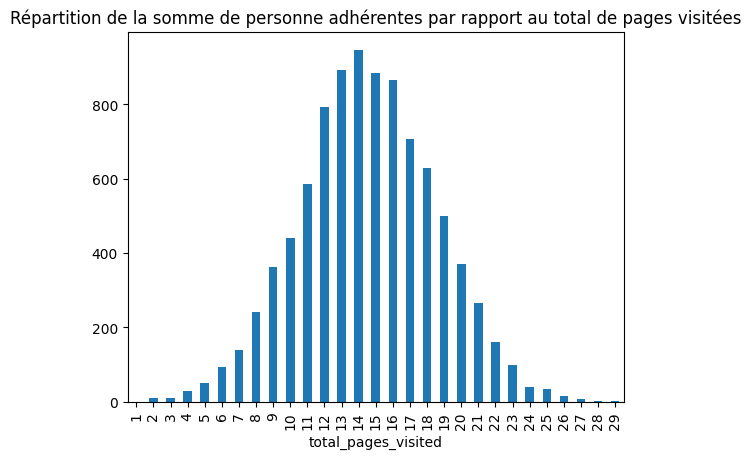

In [14]:
df.groupby(["total_pages_visited"])['converted'].sum().plot(kind='bar', title= "Répartition de la somme de personne adhérentes par rapport au total de pages visitées")